<a href="https://colab.research.google.com/github/namra22/AIAssignment3/blob/main/AI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json
with open('/content/kaggle.json') as f:
    kaggle_json = json.load(f)
    os.environ['KAGGLE_USERNAME'] = kaggle_json['username']
    os.environ['KAGGLE_KEY'] = kaggle_json['key']

In [2]:
!kaggle datasets download shanegerami/ai-vs-human-text

Dataset URL: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text
License(s): other
 98% 344M/350M [00:04<00:00, 143MB/s]
100% 350M/350M [00:04<00:00, 78.7MB/s]


In [3]:
!unzip ai-vs-human-text.zip

Archive:  ai-vs-human-text.zip
  inflating: AI_Human.csv            


In [4]:

import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('/content/AI_Human.csv')

In [6]:
df.shape

(487235, 2)

In [7]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [8]:
print('Total Texts:', df['generated'].count())
print('Human Written Texts:', (df['generated'] == 0.0).sum())
print('AI Generated Texts:', (df['generated'] == 1.0).sum())

Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


In [9]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [10]:
import re
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')


stopwords.words('english')
exclude = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [11]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

#exclude = "!.,?"
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [12]:
df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(remove_html_tags)

df['text'] = df['text'].apply(remove_url)

df['text'] = df['text'].apply(remove_punc)

In [13]:
df['text'][0]

'cars cars have been around since they became famous in the 1900s when henry ford created and built the first modelt cars have played a major role in our every day lives since then but now people are starting to question if limiting car usage would be a good thing to me limiting the use of cars might be a good thing to do\n\nin like matter of this article in german suburb life goes on without cars by elizabeth rosenthal states how automobiles are the linchpin of suburbs where middle class families from either shanghai or chicago tend to make their homes experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe passenger cars are responsible for 12 percent of greenhouse gas emissions in europeand up to 50 percent in some carintensive areas in the united states cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go article paris bans driving due

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= ' '.join(filtered_words)
    return filtered_words

df['text']=df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['text'][0]

'cars cars around since became famous 1900s henry ford created built first modelt cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing like matter article german suburb life goes without cars elizabeth rosenthal states automobiles linchpin suburbs middle class families either shanghai chicago tend make homes experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe passenger cars responsible 12 percent greenhouse gas emissions europeand 50 percent carintensive areas united states cars main reason greenhouse gas emissions lot people driving around time getting need go article paris bans driving due smog robert duffer says paris days nearrecord pollution enforced partial driving ban clear air global city also says monday motorist evennumbered license plates ordered leave cars home fined 22euro fine 31 order would applied oddnumbered plates following day cars reason polluting

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def apply_lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)
df['text'] = df['text'].apply(apply_lemmatization)



In [17]:
df['text'][0]

'car car around since became famous 1900s henry ford created built first modelt car played major role every day life since people starting question limiting car usage would good thing limiting use car might good thing like matter article german suburb life go without car elizabeth rosenthal state automobile linchpin suburb middle class family either shanghai chicago tend make home expert say huge impediment current effort reduce greenhouse gas emission tailpipe passenger car responsible 12 percent greenhouse gas emission europeand 50 percent carintensive area united state car main reason greenhouse gas emission lot people driving around time getting need go article paris ban driving due smog robert duffer say paris day nearrecord pollution enforced partial driving ban clear air global city also say monday motorist evennumbered license plate ordered leave car home fined 22euro fine 31 order would applied oddnumbered plate following day car reason polluting entire city like paris show ba

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


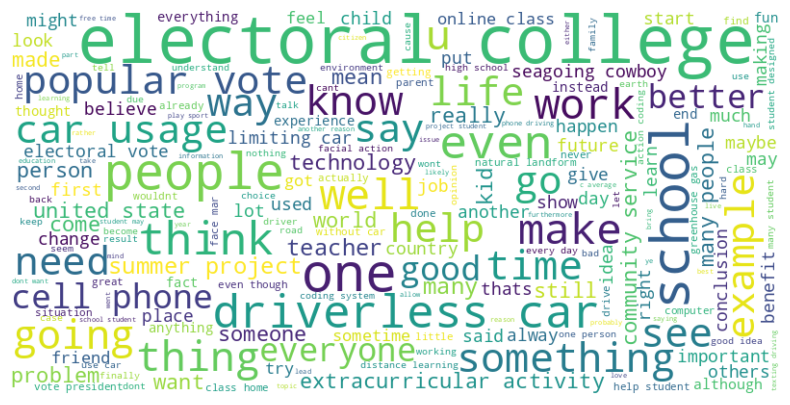

In [19]:
human_data = df[df['generated'] == 0.0].sample(10000)
human_text = ' '.join(human_data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(human_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


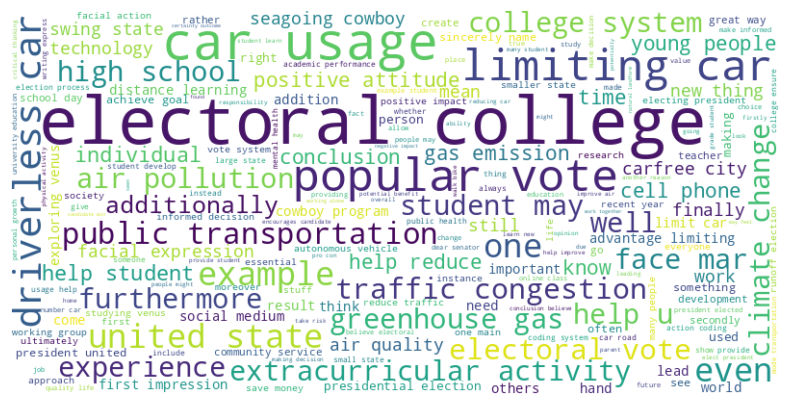

In [20]:
ai_data = df[df['generated'] == 1.0].sample(10000)
ai_text = ' '.join(ai_data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ai_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score


In [22]:
sampled_df = df.sample(10000, random_state=42)
text_data = sampled_df['text']
labels = sampled_df['generated']


In [23]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(text_data)

y = labels


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Results:
Accuracy: 0.9670
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1232
         1.0       0.98      0.93      0.96       768

    accuracy                           0.97      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.97      0.97      2000



In [26]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Results:
Accuracy: 0.9810
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1232
         1.0       0.98      0.97      0.98       768

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [27]:
!pip install transformers
!pip install datasets
!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [28]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

In [29]:
sampled_df = df.sample(10000, random_state=42)
sampled_df = sampled_df.rename(columns={'text': 'text', 'generated': 'label'})

train_df, test_df = train_test_split(sampled_df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


In [30]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_function(example):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [36]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [38]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.053100,0.037367


TrainOutput(global_step=500, training_loss=0.09517559492588043, metrics={'train_runtime': 13153.2641, 'train_samples_per_second': 0.608, 'train_steps_per_second': 0.038, 'total_flos': 526217385984000.0, 'train_loss': 0.09517559492588043, 'epoch': 1.0})